In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
labels_array = np.random.randint(0, 2, size=(10, 10, 8))
labels_array[0, 0, 0],

(1,)

In [3]:
sample_array = np.random.randint(0, 2, size=(20, 20, 16))

In [20]:
sample_array = np.random.randint(0, 10, size=(20, 20, 16))
sample_array.shape

(20, 20, 16)

In [4]:
import numpy as np
import networkx as nx

# Create a sample array of shape 20, 20, 16
sample_array = np.random.randint(0, 10, size=(20, 20, 16))

# Create a NetworkX graph
G = nx.Graph()

# Iterate through the array to add nodes and edges
for i in range(sample_array.shape[0]):
    for j in range(sample_array.shape[1]):
        for k in range(sample_array.shape[2]):
            current_label = tuple(sample_array[i, j, :])  # Use tuple to make it hashable
            
            # Add node to the graph if not already present
            if not G.has_node(current_label):
                G.add_node(current_label)
            
            # Check neighboring voxels for the same label to establish connections
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    for dk in [-1, 0, 1]:
                        if (di != 0 or dj != 0 or dk != 0) and \
                           0 <= i + di < sample_array.shape[0] and \
                           0 <= j + dj < sample_array.shape[1] and \
                           0 <= k + dk < sample_array.shape[2]:
                            
                            neighbor_label = tuple(sample_array[i + di, j + dj, :])
                            
                            if current_label != neighbor_label:
                                # Add an edge between nodes with different labels
                                G.add_edge(current_label, neighbor_label)


In [5]:
connected_nodes = list(G.neighbors(tuple(sample_array[0, 0, :])))
print("Nodes connected to [0, 0, 0]:", connected_nodes)

Nodes connected to [0, 0, 0]: [(0, 9, 0, 4, 3, 2, 1, 8, 2, 3, 4, 8, 5, 7, 9, 5), (9, 3, 5, 9, 2, 7, 8, 6, 8, 1, 0, 9, 5, 4, 8, 8), (2, 5, 8, 7, 6, 2, 7, 4, 1, 6, 0, 7, 7, 8, 7, 6)]


In [6]:
sample_array = np.random.randint(0, 10, size=(20, 20, 16))
sample_array.shape

(20, 20, 16)

In [7]:
G = nx.Graph()

for i in range(10):
    for j in range(10):
        for k in range(10):
            node_coordinates = (i, j, k)
            G.add_node(node_for_adding=node_coordinates)


In [8]:
test = np.random.randint(0, 7, size=(10, 10, 10))
test[0, :, :]



array([[2, 1, 5, 4, 6, 4, 6, 0, 6, 2],
       [2, 5, 0, 3, 2, 4, 1, 5, 1, 0],
       [4, 3, 4, 2, 4, 3, 3, 0, 5, 3],
       [0, 4, 5, 6, 4, 6, 4, 2, 3, 1],
       [5, 2, 1, 1, 1, 5, 4, 0, 5, 3],
       [0, 6, 4, 2, 1, 2, 6, 3, 6, 3],
       [3, 2, 0, 6, 4, 1, 1, 3, 3, 1],
       [6, 0, 6, 0, 4, 6, 6, 5, 0, 3],
       [6, 4, 4, 2, 6, 5, 5, 2, 5, 6],
       [6, 4, 0, 2, 3, 4, 1, 4, 6, 6]])

In [9]:
tuple(np.array([0,0,0]))

(0, 0, 0)

In [10]:
hash(tuple(np.array([1])))

-6644214454873602895

In [12]:
from dataclasses import dataclass, field
from typing import List, Any, Tuple

@dataclass
class Node:
    node_coordinates: Tuple[int, int, int]
    node_label: int
    node_edges: List[Tuple[int, int, int]] = field(default_factory=list)
    node_feature_vector: Any = None
    

    def __hash__(self):
        return hash(self.node_coordinates)


In [91]:
n0 = Node(node_coordinates=(0,0,0), node_edges= same_cluster_coordinates)

In [89]:
n0.node_coordinates

(0, 0, 0)

In [13]:
import numpy as np
import networkx as nx

test_labels = np.random.randint(0, 4, size=(8, 8, 8))  # Example random labels, replace it with your actual data
test_labels[0,:, :]

array([[1, 2, 1, 2, 2, 0, 3, 3],
       [1, 2, 0, 3, 2, 2, 2, 1],
       [1, 3, 1, 2, 0, 0, 0, 0],
       [2, 2, 0, 3, 1, 0, 0, 0],
       [1, 1, 3, 2, 0, 1, 3, 3],
       [0, 2, 1, 1, 3, 2, 0, 3],
       [0, 0, 2, 1, 1, 3, 1, 2],
       [3, 2, 2, 2, 2, 3, 1, 1]])

In [21]:

class CustomGraph(nx.Graph):
    def __init__(self, labels=None, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.labels = labels

    def add_node_with_coordinates(self, x, y, z):
        if self.labels is None:
            raise ValueError("Labels array is not provided.")
        
        current_node = (x, y, z)
        current_node_label = self.labels[x, y, z]

        # Check if the node already exists in the graph
        if current_node not in self.nodes():
            self.add_node(current_node)

            # Find other nodes in the same cluster
            same_cluster_coordinates = [
                (tuple(node), current_node)
                for node in list(np.array(np.where(self.labels == current_node_label)).T)
                if tuple(node) != current_node  # Exclude self-loop
            ]

            # Add edges from other nodes in the same cluster to the current node
            self.add_edges_from(same_cluster_coordinates)
            
# Test the CustomGraph class

G = CustomGraph(labels=test_labels)

print("Number of edges in the graph:", len(G.edges()))

Number of edges in the graph: 0


In [22]:
for i in range(test_labels.shape[0]):
    for j in range(test_labels.shape[1]):
        for k in range(test_labels.shape[2]):
            G.add_node_with_coordinates(i, j, k)

In [23]:
G.nodes()

NodeView(((0, 0, 0), (0, 0, 2), (0, 1, 0), (0, 1, 7), (0, 2, 0), (0, 2, 2), (0, 3, 4), (0, 4, 0), (0, 4, 1), (0, 4, 5), (0, 5, 2), (0, 5, 3), (0, 6, 3), (0, 6, 4), (0, 6, 6), (0, 7, 6), (0, 7, 7), (1, 0, 1), (1, 0, 3), (1, 0, 4), (1, 1, 2), (1, 3, 3), (1, 3, 7), (1, 4, 3), (1, 5, 5), (1, 6, 0), (1, 7, 0), (1, 7, 1), (1, 7, 2), (1, 7, 5), (1, 7, 7), (2, 0, 1), (2, 0, 3), (2, 0, 4), (2, 1, 2), (2, 2, 0), (2, 2, 4), (2, 3, 7), (2, 4, 0), (2, 4, 6), (2, 4, 7), (2, 5, 2), (2, 5, 7), (2, 6, 3), (2, 6, 4), (2, 7, 1), (2, 7, 4), (2, 7, 5), (3, 0, 2), (3, 0, 4), (3, 0, 7), (3, 1, 0), (3, 1, 7), (3, 2, 0), (3, 2, 1), (3, 2, 4), (3, 3, 1), (3, 4, 6), (3, 5, 0), (3, 5, 2), (3, 5, 5), (4, 0, 6), (4, 0, 7), (4, 1, 6), (4, 1, 7), (4, 2, 1), (4, 2, 4), (4, 3, 0), (4, 3, 2), (4, 3, 5), (4, 3, 6), (4, 4, 0), (4, 4, 3), (4, 4, 7), (4, 5, 1), (4, 5, 2), (4, 5, 3), (4, 6, 2), (4, 6, 6), (4, 6, 7), (4, 7, 3), (4, 7, 5), (5, 0, 6), (5, 0, 7), (5, 1, 0), (5, 1, 1), (5, 1, 5), (5, 1, 7), (5, 2, 3), (5, 2, 4), 

In [24]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(240, 240, 154)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x, y, z = data.shape
x_data, y_data, z_data = np.indices((x, y, z))
data_normalized = (data - data.min()) / (data.max() - data.min())

ax.scatter(x_data.flatten(),
           y_data.flatten(),
           z_data.flatten(),
           c=data_normalized.flatten(),
           cmap='viridis',
           marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Voxel Grid')

plt.show()


KeyboardInterrupt: 

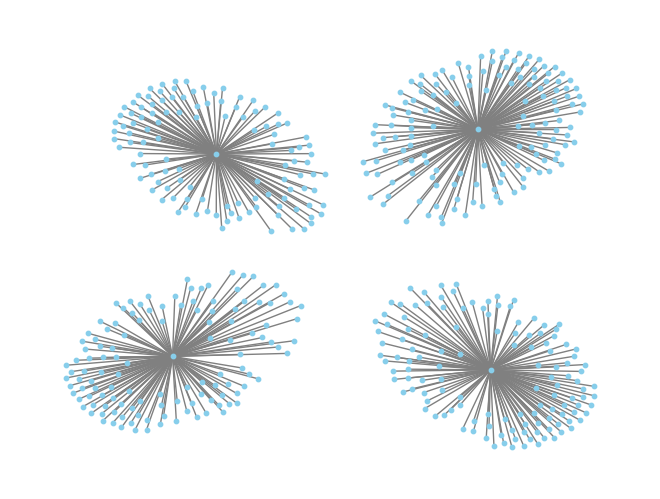

In [18]:
# Calculate the positions of nodes using the spring layout algorithm
pos = nx.spring_layout(G, k=0.3, iterations=100)

# Draw the graph with modified parameters
nx.draw(G, pos=pos, with_labels=False, font_weight='bold', node_color='skyblue', edge_color='gray', node_size=10, font_size=12, alpha=1)


In [161]:
nx.write_gexf(G, "test.graphml")

In [123]:
np.unique(test_labels, return_counts=True)

(array([0, 1, 2]), array([315, 341, 344]))

In [113]:
G = nx.Graph()

def add_node(x, y, z, labels_array = test):
    
    current_node = (x, y, z)
    current_node_label = labels_array[x, y, z]
    
    if current_node not in G.nodes():
        G.add_node(current_node)
    
    same_cluster_coordinates = [
        (tuple(node), (x, y, z))
        for node in list(np.array(np.where(test == current_node_label)).T)
    ]
    G.add_edges_from(same_cluster_coordinates)
    same_cluster_coordinates

add_node(0, 0, 0, test)
add_node(0, 1, 0, test)

len(G.edges())

301

146

In [51]:
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        for k in range(test.shape[2]):
            if test[i, j, k] == 12:
                print(i, j, k)

4 4 4
4 9 5


In [28]:
G = nx.Graph()
for i in range(sample_array.shape[0]):
    for j in range(sample_array.shape[1]):
        for k in range(sample_array.shape[2]):
            current_label = tuple(sample_array[i, j, k])
            print(current_label)
            
            break
        break
    break
            
            # if not G.has_node(current_label):
            #     G.add_node(current_label)
            # for di in [-1, 0, 1]:
            #     for dj in [-1, 0, 1]:
            #         for dk in [-1, 0, 1]:
            #             if (di != 0 or dj != 0 or dk != 0) and \
            #                0 <= i + di < sample_array.shape[0] and \
            #                0 <= j + dj < sample_array.shape[1] and \
            #                0 <= k + dk < sample_array.shape[2]:
            #                 neighbor_label = tuple(sample_array[i + di, j + dj, :])
            #                 if current_label != neighbor_label:
            #                     G.add_edge(current_label, neighbor_label)

TypeError: 'numpy.int64' object is not iterable